In [1]:
import numpy as np
import cvxpy as cp

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

x1, x2, x3 = cp.Variable(), cp.Variable(), cp.Variable()

objective = cp.Minimize(300*x1 + 500*x2 + 800*x3)
constraints = [
    0.8*x1 + 0.3*x2 + 0.1*x3 >= 0.3,
    0.01*x1 + 0.4 * x2 + 0.7 * x3 >= 0.7,
    0.15*x1 + 0.1 * x2 + 0.2 * x3 >= 0.1,
    x1 >= 0,
    x2 >= 0,
    x3 >= 0
]

problem = cp.Problem(objective, constraints)
problem.solve()
problem.objective.value, x1.value, x2.value, x3.value

(835.2941173746325,
 array(1.64066837e-09),
 array(0.82352941),
 array(0.52941176))

In [3]:
x1, x2, x3 = cp.Variable(), cp.Variable(), cp.Variable()

objective = cp.Minimize(0.15 * x1 + 0.25 * x2 + 0.05 * x3)
constraints = [
    70 * x1 + 121 * x2 + 65 * x3 >= 2000,
    70 * x1 + 121 * x2 + 65 * x3 <= 2250,
    107 * x1 + 500 * x2 + 40 * x3 >= 5000,
    107 * x1 + 500 * x2 + 40 * x3 <= 10000,
    45 * x1 + 40 * x2 + 60 * x3 <= 1000,
    x1 >= 0,
    x2 >= 0,
    x3 >= 0,
    x1 <= 10,
    x2 <= 10,
    x3 <= 10
]

problem = cp.Problem(objective, constraints)
problem.solve()

problem.objective.value, x1.value, x2.value, x3.value

(3.7411764712617352, array(6.5882353), array(10.), array(5.05882352))

In [4]:
xlek1, xlek2, xsur1, xsur2 = cp.Variable(), cp.Variable(), cp.Variable(), cp.Variable()
x = cp.hstack([xlek1, xlek2, xsur1, xsur2])
f_cost = np.array([700, 800, 100, 199.9])
f_income = np.array([6500, 7100, 0, 0])

objective = cp.Minimize(f_cost @ x - f_income @ x)

constraints = [
    -0.5 * xlek1 - 0.6 * xlek2 + 0.01 * xsur1 + 0.02 * xsur2 >= 0,
    xsur1 + xsur2 <= 1000,
    90 * xlek1 + 100 * xlek2 <= 2000,
    40 * xlek1 + 50  * xlek2 <= 800,
    100 * xsur1 + 199.9 * xsur2 + 700 * xlek1 + 800 * xlek2 <= 100000,
    xlek1 >= 0,
    xlek2 >= 0,
    xsur1 >= 0,
    xsur2 >= 0
]

problem = cp.Problem(objective, constraints)
problem.solve()

problem.objective.value, x.value

(-14085.12505159121,
 array([1.75515577e+01, 5.22042753e-10, 5.56227958e-06, 4.38788940e+02]))

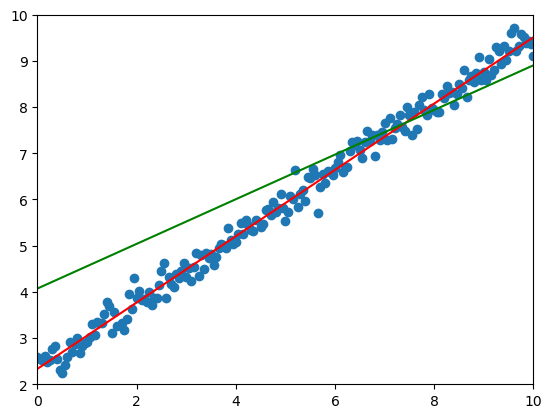

[array(0.71777236), array(2.33457073)] [array(0.48323691), array(4.0729249)]


In [5]:
import os 

data = []
with open('./data01.csv', 'r') as input_obj:
    lines = input_obj.readlines()
    lines = [line.strip() for line in lines]
    lines = [line.split(',') for line in lines]
    lines = [[np.float64(x) for x in line] for line in lines]
    data = np.array(lines)

def get_solve_for_n(n):
    a, b = cp.Variable(), cp.Variable()
    phi = cp.hstack([a, b])

    omega = np.array(
        [[x, np.float64(1)] for x in data[:, 0]]
    )

    y = np.array(data[:, 1])

    objective = cp.Minimize(cp.norm(omega @ phi - y, n))
    problem = cp.Problem(objective)
    problem.solve()

    solve = [a.value, b.value]

    return solve

solve, solve2 = get_solve_for_n(1), get_solve_for_n(2)

import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1])
for (a, b), color in zip([solve, solve2], ['r', 'g']):
    plt.plot(data[:, 0], a * data[:, 0] + b, color = color)

# cut plot to [0, 10] x [2, 10]
plt.xlim(0, 10)
plt.ylim(2, 10)

plt.show()

print(solve, solve2)

In [17]:
c = cp.hstack([0 for _ in range(2)] + [1 for _ in range(len(data))])

z = cp.hstack([cp.Variable() for _ in range(len(data) + 2)])

A = []
for i in range(len(data)):
    a = [data[i, 0], np.float64(1)]
    for j in range(len(data)):
        if i == j:
            a.append(-1)
        else:
            a.append(0)
    A.append(a)
for i in range(len(data)):
    a = [-data[i, 0], -np.float64(1)]
    for j in range(len(data)):
        if i == j:
            a.append(-1)
        else:
            a.append(0)
    A.append(a)
A = np.array(A)

b = np.array([v for v in data[:, 1]] + [-v for v in data[:, 1]])

# minimize c^T * z
objective = cp.Minimize(c @ z)

# A * z <= b   
constraints = [A @ z <= b]

problem = cp.Problem(objective, constraints)
problem.solve()

z.value[:2]

array([0.71777236, 2.33457073])